In [35]:
import sqlite3
import pandas as pd

# Bar chart
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [29]:
conn = sqlite3.connect('database2.db')
conn

In [30]:
# Artists
cur = conn.cursor()
cur.execute('SELECT * from artists LIMIT 100')
DF_Artists = cur.fetchall()

In [40]:
DFArtists = pd.DataFrame(DF_Artists, columns=['ReviewID', 'Artists'])
DFArtists

,ReviewID,Artists
0,22703,massive attack
1,22721,krallice
2,22659,uranium club
3,22661,kleenex
4,22661,liliput
...,...,...
95,22674,burial
96,22670,yg
97,22646,you blew it!
98,22535,suzanne kraft


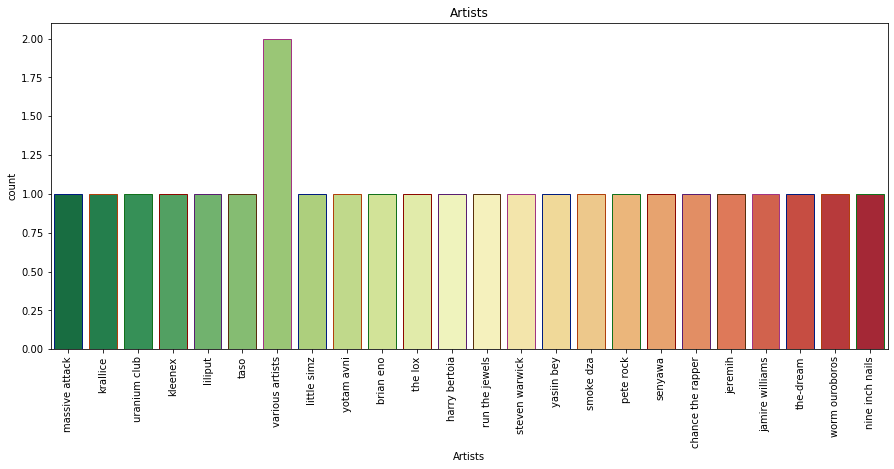

In [42]:
plt.subplots(figsize=(15,6))
sns.countplot('Artists', data=DFArtists[:25] ,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Artists')
plt.show()

In [32]:
# Genres
cur = conn.cursor()
cur.execute('SELECT * from genres LIMIT 100')
DF_Genres = cur.fetchall()

In [43]:
DFGenres = pd.DataFrame(DF_Genres, columns=['ReviewID', 'Genres'])
DFGenres

,ReviewID,Genres
0,22703,electronic
1,22721,metal
2,22659,rock
3,22661,rock
4,22725,electronic
...,...,...
95,22652,jazz
96,22674,experimental
97,22674,electronic
98,22670,rap


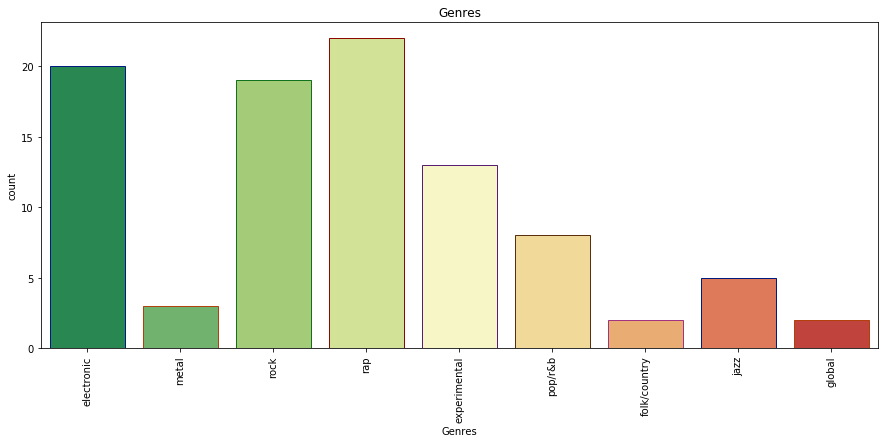

In [69]:
plt.subplots(figsize=(15,6))
sns.countplot('Genres', data=DFGenres ,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Genres')
plt.show()

In [48]:
# Reviews
cur = conn.cursor()
cur.execute('SELECT * from reviews LIMIT 100')
DF_Reviews = cur.fetchall()

In [49]:
DFReviews = pd.DataFrame(DF_Genres, columns=['ReviewID', 'Title', 'Artists', 'URL', 'Score', 'Best_new_music', 'Author', 'Author_type', 'PUB_date',
                                           'PUB_weekday', 'PUB_day', 'PUB_month', 'PUB_year'])
DFReviews

,ReviewID,Title,Artists,URL,Score,Best_new_music,Author,Author_type,PUB_date,PUB_weekday,PUB_day,PUB_month,PUB_year
0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017
1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017
2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017
3,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017
4,22725,new start,taso,http://pitchfork.com/reviews/albums/22725-new-...,8.1,0,kevin lozano,tracks coordinator,2017-01-06,4,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22644,woman,justice,http://pitchfork.com/reviews/albums/22644-woman/,5.2,0,mehan jayasuriya,contributor,2016-11-29,1,29,11,2016
96,22649,wonderland,demdike stare,http://pitchfork.com/reviews/albums/22649-wond...,8.2,0,philip sherburne,contributing editor,2016-11-29,1,29,11,2016
97,22583,defy a thing to be,bully fae,http://pitchfork.com/reviews/albums/22583-defy...,6.5,0,kevin lozano,tracks coordinator,2016-11-29,1,29,11,2016
98,22595,l.a. heartbreak,rainbow arabia,http://pitchfork.com/reviews/albums/22595-la-h...,6.5,0,"edwin ""stats"" houghton",None,2016-11-29,1,29,11,2016


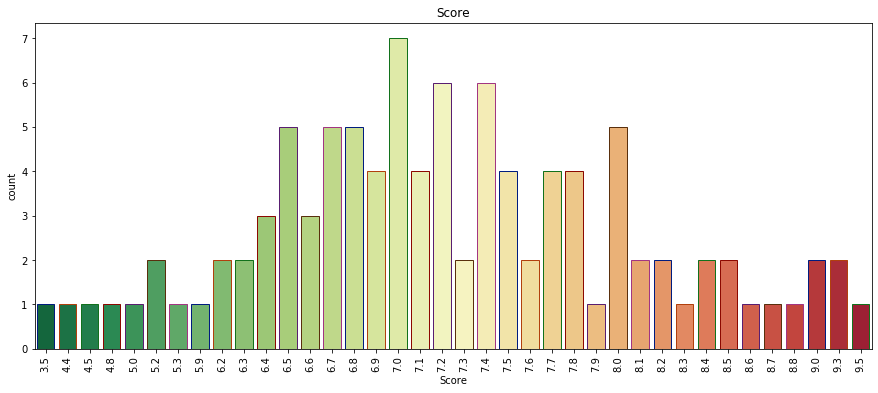

In [75]:
# Score distribution
plt.subplots(figsize=(15,6))
sns.countplot('Score', data=DFReviews, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Score')
plt.show()

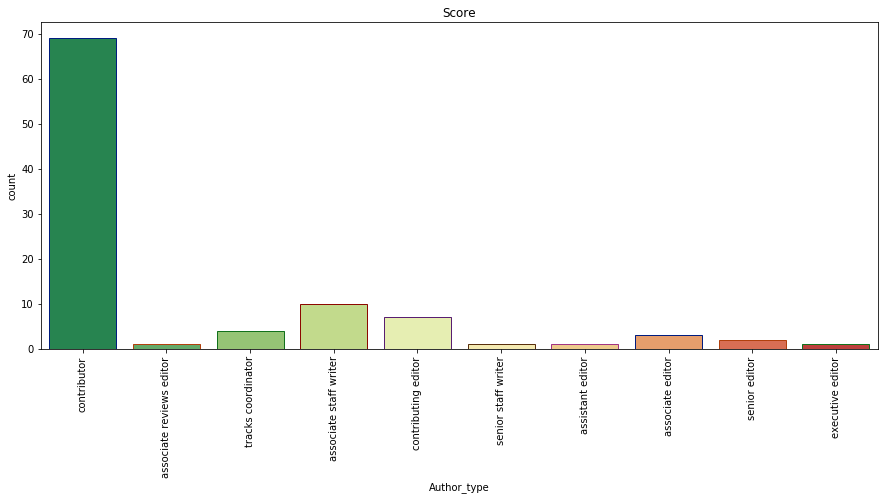

In [76]:
# Author type
plt.subplots(figsize=(15,6))
sns.countplot('Author_type', data=DFReviews, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Author type')
plt.show()

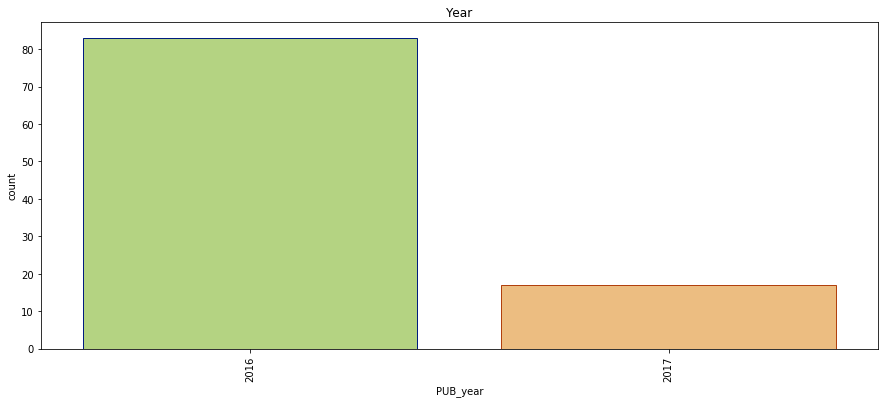

In [78]:
# Year
plt.subplots(figsize=(15,6))
sns.countplot('PUB_year', data=DFReviews, palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Year')
plt.show()

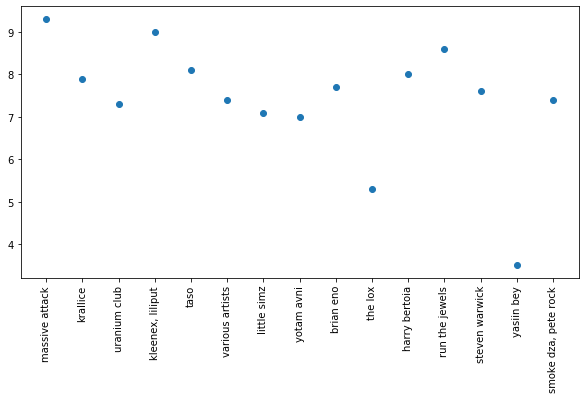

In [63]:
# Artists with Score

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(DFReviews['Artists'][:15], DFReviews['Score'][:15])
plt.xticks(rotation=90)
plt.show()

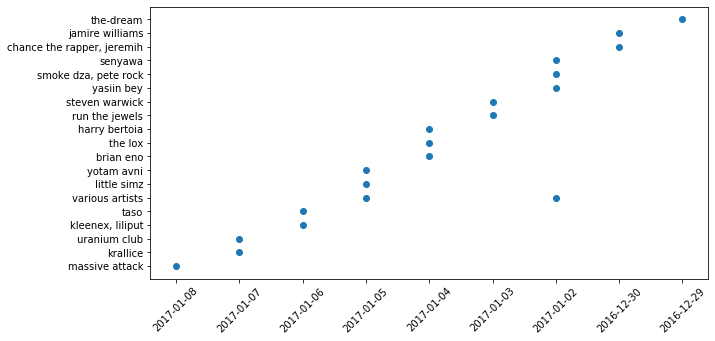

In [59]:
# Artists against Year

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(DFReviews['PUB_date'][:20], DFReviews['Artists'][:20])
plt.xticks(rotation=45)
plt.show()

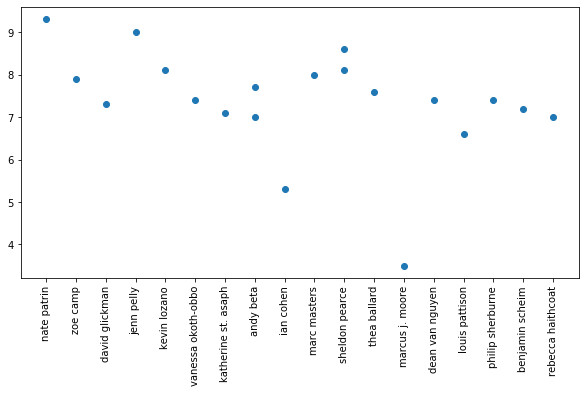

In [61]:
# Score and Author

%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(DFReviews['Author'][:20], DFReviews['Score'][:20])
plt.xticks(rotation=90)
plt.show()

In [64]:
# Group by author

DFReviews.groupby('Author').count()

,ReviewID,Title,Artists,URL,Score,Best_new_music,Author_type,PUB_date,PUB_weekday,PUB_day,PUB_month,PUB_year
Author,,,,,,,,,,,,
andrew gaerig,1,1,1,1,1,1,1,1,1,1,1,1
andy beta,8,8,8,8,8,8,8,8,8,8,8,8
ben scheim,1,1,1,1,1,1,1,1,1,1,1,1
benjamin scheim,5,5,5,5,5,5,5,5,5,5,5,5
brian howe,1,1,1,1,1,1,1,1,1,1,1,1
cameron cook,1,1,1,1,1,1,1,1,1,1,1,1
daniel martin-mccormick,2,2,2,2,2,2,2,2,2,2,2,2
david glickman,1,1,1,1,1,1,1,1,1,1,1,1
david turner,1,1,1,1,1,1,1,1,1,1,1,1


In [65]:
# Left Join on reviews and content tables
cur = conn.cursor()
cur.execute('select r. author, r.artist, r.score from reviews r  LEFT JOIN content c ON (r.reviewid = c.reviewid)')
DF_details = cur.fetchall()

In [68]:
DF_details = pd.DataFrame(DF_details, columns=['Author', 'Artist', 'Score'])
DF_details[:100]

,Author,Artist,Score
0,nate patrin,massive attack,9.3
1,zoe camp,krallice,7.9
2,david glickman,uranium club,7.3
3,jenn pelly,"kleenex, liliput",9.0
4,kevin lozano,taso,8.1
...,...,...,...
95,mehan jayasuriya,justice,5.2
96,philip sherburne,demdike stare,8.2
97,kevin lozano,bully fae,6.5
98,"edwin ""stats"" houghton",rainbow arabia,6.5


In [84]:
# Inner join on artists, years and genres
cur = conn.cursor()
cur.execute('select a.artist, y.year, g.genre from artists a INNER JOIN years y ON (a.reviewid = y.reviewid) INNER JOIN genres g ON (g.reviewid = a.reviewid)')
DF_InnerJoin = cur.fetchall()

In [85]:
DF_InnerJoin = pd.DataFrame(DF_InnerJoin, columns=['Artist', 'Year', 'Genres'])
DF_InnerJoin[:100]

,Artist,Year,Genres
0,massive attack,1998.0,electronic
1,krallice,2016.0,metal
2,uranium club,2016.0,rock
3,kleenex,2016.0,rock
4,liliput,2016.0,rock
...,...,...,...
95,john lennon,1968.0,rock
96,john lennon,2016.0,experimental
97,john lennon,2016.0,rock
98,coldcut,2016.0,electronic


In [95]:
DFIJ = DF_InnerJoin.fillna('0')
DFIJ

,Artist,Year,Genres
0,massive attack,1998,electronic
1,krallice,2016,metal
2,uranium club,2016,rock
3,kleenex,2016,rock
4,liliput,2016,rock
...,...,...,...
24379,mojave 3,0,rock
24380,don caballero,1999,experimental
24381,don caballero,1999,metal
24382,don caballero,1999,rock


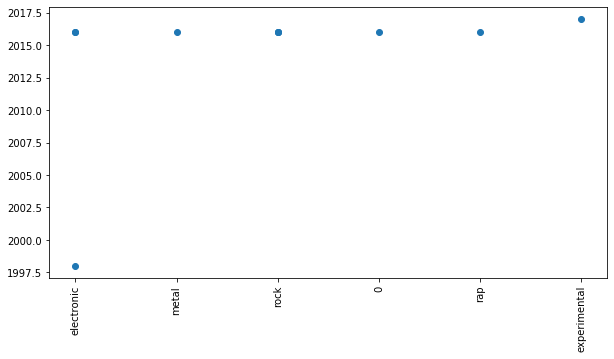

In [96]:
# Genres - year scatter plot
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,5)
plt.scatter(DFIJ['Genres'][:10], DFIJ['Year'][:10])
plt.xticks(rotation=90)
plt.show()

In [111]:
# Inner join on Artists, score, genres and content
cur = conn.cursor()
cur.execute('select a.artist, r.score, c.content, g.genre from artists a INNER JOIN reviews r ON (a.reviewid = r.reviewid) INNER JOIN genres g ON (g.reviewid = a.reviewid) INNER JOIN content c ON (r.reviewid = c.reviewid) ')
DF_InnerJoinContent = cur.fetchall()

In [112]:
DF_InnerJoinContent = pd.DataFrame(DF_InnerJoinContent, columns=['Artist', 'Score', 'Genre', 'content'])
DF_InnerJoinContent[:100]

,Artist,Score,Genre,content
0,massive attack,9.3,"“Trip-hop” eventually became a ’90s punchline,...",electronic
1,krallice,7.9,"Eight years, five albums, and two EPs in, the ...",metal
2,uranium club,7.3,Minneapolis’ Uranium Club seem to revel in bei...,rock
3,kleenex,9.0,Kleenex began with a crash. It transpired one ...,rock
4,liliput,9.0,Kleenex began with a crash. It transpired one ...,rock
...,...,...,...,...
95,benjamin lazar davis,6.9,"In their respective careers, singer-songwriter...",pop/r&b
96,benjamin lazar davis,6.9,"In their respective careers, singer-songwriter...",rock
97,brand new,8.5,"At the turn of the century, emo had finally go...",rock
98,sun ra,8.7,How do you pin down Sun Ra? The cosmic jazzman...,jazz
